In [150]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
data_dir = './vaccine_data/hhs_data'

In [50]:
train_years = ['2012','2013','2014']
dev_years = ['2015']
test_years = ['2016','2017']

train_download_dir = ('train',train_years)
dev_download_dir = ('dev',dev_years)
test_download_dir = ('test',test_years)
data_split_ls = [train_download_dir,dev_download_dir,test_download_dir]

## Plotting trends year on year dev

<function matplotlib.pyplot.show>

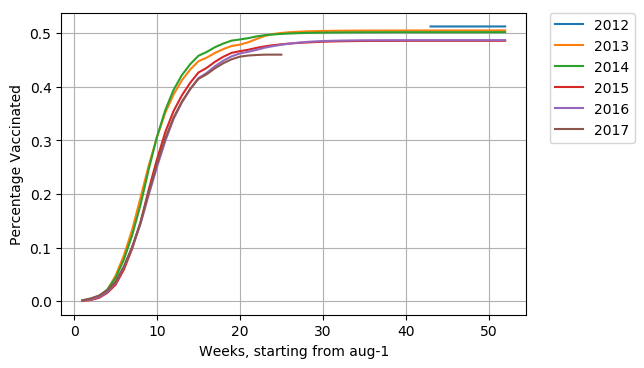

In [73]:
fig=plt.figure( dpi= 100)

for data_split in data_split_ls:
    split,years = data_split
    for year in years:
        data = pd.read_json(open(os.path.join(data_dir,split,year,'national.json')))
        # data = data[['week','count','percentage','disparity','week_start']]
        plt.plot(data['week'],data['percentage'],label=year);
        
plt.grid()     
plt.xlabel('Weeks, starting from aug-1')
plt.ylabel('Percentage Vaccinated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show

In [79]:
data = pd.read_json(open(os.path.join(data_dir,'train','2013','national.json')))


In [223]:
# removing test
data_split_ls = [train_download_dir,dev_download_dir]

### Predicting week n+p based on week n,n-1,n-2 ... n-k

In [235]:
k = 5
p = 5

for data_split in data_split_ls:
    split,years = data_split
    for year in years:
        if year == '2012':
            continue;
        data = pd.read_json(open(os.path.join(data_dir,split,year,'national.json')))
        percentage = list(data.percentage.values)
        # percentage = [0,1,2,3,4,5,6,7,8,9,10,11]
        Y = []
        X = []
        for i in range(k,len(percentage)-p):
            x_col = []
            for j in range(i-k,i):
                x_col.append(percentage[j])
            X.append(x_col)
            Y.append(percentage[i+p-1])
        # sanity checks
        # print('X[0]',X[0])
        # print('Y first target',[Y[0]])
        # print('len Y {} len X {}'.format(len(Y),len(X)))

        assert(len(Y)==len(X))

        model = linear_model.LinearRegression()
        model.fit(X,Y)
        y_pred = model.predict(X)
        error = metrics.mean_squared_error(y_pred,Y)
        print("National Data Split:{} Year:{}".format(split, year))
        print("-"*50)
        print('Model coefficents {}, Model Bias {}'.format(model.coef_,model.intercept_))
        print('error',error)
        print("\n")


National Data Split:train Year:2013
--------------------------------------------------
Model coefficents [ 0.32266353 -0.13057027 -0.36488228 -0.85575199  1.50377051], Model Bias 0.2659052400898162
error 1.1016025906471805e-05


National Data Split:train Year:2014
--------------------------------------------------
Model coefficents [-0.10452977  0.54432134 -0.03220901 -1.98596891  2.03035051], Model Bias 0.2751796069116755
error 1.8113843978531418e-05


National Data Split:dev Year:2015
--------------------------------------------------
Model coefficents [-0.1212454   0.72632931 -0.41316424 -1.79163222  2.09644048], Model Bias 0.24462062992971434
error 2.032392988468018e-05




In [236]:
k = 2
p = 2

for data_split in data_split_ls:
    split,years = data_split
    for year in years:
        if year == '2012':
            continue;
        data = pd.read_json(open(os.path.join(data_dir,split,year,'national.json')))
        percentage = list(data.percentage.values)
        # percentage = [0,1,2,3,4,5,6,7,8,9,10,11]
        Y = []
        X = []
        for i in range(k,len(percentage)-p):
            x_col = []
            for j in range(i-k,i):
                x_col.append(percentage[j])
            X.append(x_col)
            Y.append(percentage[i+p-1])
        # sanity checks
        # print('X[0]',X[0])
        # print('Y first target',[Y[0]])
        # print('len Y {} len X {}'.format(len(Y),len(X)))

        assert(len(Y)==len(X))

        model = linear_model.LinearRegression()
        model.fit(X,Y)
        y_pred = model.predict(X)
        error = metrics.mean_squared_error(y_pred,Y)
        print("National Data Split:{} Year:{}".format(split, year))
        print("-"*50)
        print('Model coefficents {}, Model Bias {}'.format(model.coef_,model.intercept_))
        print('error',error)
        print("\n")


National Data Split:train Year:2013
--------------------------------------------------
Model coefficents [-1.38774307  2.30121874], Model Bias 0.042298394539662276
error 5.5514562823384555e-05


National Data Split:train Year:2014
--------------------------------------------------
Model coefficents [-1.43322162  2.34880253], Model Bias 0.04082598125602199
error 7.673010758915803e-05


National Data Split:dev Year:2015
--------------------------------------------------
Model coefficents [-1.46177858  2.38663286], Model Bias 0.03502446209976501
error 7.036577836190222e-05




In [237]:
k = 5
p = 1

for data_split in data_split_ls:
    split,years = data_split
    for year in years:
        if year == '2012':
            continue;
        data = pd.read_json(open(os.path.join(data_dir,split,year,'national.json')))
        percentage = list(data.percentage.values)
        # percentage = [0,1,2,3,4,5,6,7,8,9,10,11]
        Y = []
        X = []
        for i in range(k,len(percentage)-p):
            x_col = []
            for j in range(i-k,i):
                x_col.append(percentage[j])
            X.append(x_col)
            Y.append(percentage[i+p-1])
        # sanity checks
        # print('X[0]',X[0])
        # print('Y first target',[Y[0]])
        # print('len Y {} len X {}'.format(len(Y),len(X)))

        assert(len(Y)==len(X))

        model = linear_model.LinearRegression()
        model.fit(X,Y)
        y_pred = model.predict(X)
        error = metrics.mean_squared_error(y_pred,Y)
        print("National Data Split:{} Year:{}".format(split, year))
        print("-"*50)
        print('Model coefficents {}, Model Bias {}'.format(model.coef_,model.intercept_))
        print('error',error)
        print("\n")


National Data Split:train Year:2013
--------------------------------------------------
Model coefficents [ 0.09480954 -0.05071741 -0.03110363 -0.87300752  1.81947302], Model Bias 0.020586923963751058
error 2.7972836281882363e-06


National Data Split:train Year:2014
--------------------------------------------------
Model coefficents [-0.02437525  0.17899249  0.04005467 -1.27840199  2.04715171], Model Bias 0.018401722040094604
error 3.4689139143525823e-06


National Data Split:dev Year:2015
--------------------------------------------------
Model coefficents [ 0.05653565  0.0744825  -0.18582397 -0.79411872  1.80873304], Model Bias 0.01961575463618448
error 4.152450505089719e-06


